# 이전에 했던 것은 KNN 분류
# 이번에 하는 것은 KNN 회귀



In [3]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

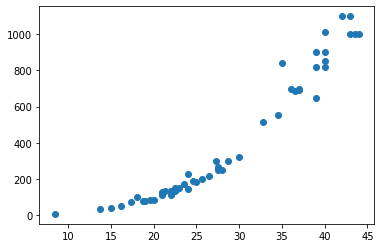

In [6]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [17]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

# 회귀는 분류와 다른 방식으로 평가를 진행한다.
# 결정계수(R^2)를 통해 평가를 할 수 있다

In [20]:
knr.score(test_input, test_target)

0.992809406101064

# 과대적합 vs 과소적합

In [22]:
knr.score(train_input, train_target)
# 훈련 세트로 평가를 했는데 결과가 더 안 좋아짐 ㄷㄷ

0.9698823289099254

훈련 세트 점수 Good<br>
테스트 세트 점수가 Bad<br>
-> 모델이 훈련 세트에 대해 **과대적합** 된 것임(훈련세트에만 잘 맞는 모델)

반대로 훈련 세트보다 테스트 세트 점수가 높거나<br>
두 점수 너무 낮은 경우는?<br>
-> 모델이 훈련 세트에 대해 **과소적합** 된 것임(모델이 단순하여 훈련 세트에 적절히 훈련이 안된 경우)




### 위에서 만든 모델은 훈련 세트보다 테스트 세트 점수가 더 높게 나왔다. 과소적합이 일어난 것

해결법 -> 모델을 더 복잡하게 만들면 된다. <br>
KNN 모델 복잡하게 만드는 법 : 이웃의 k개수 줄이기

In [25]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

# 과소적합 문제 해결! 
# 훈련,테스트 점수 차이가 크지도 않으니 과대적합도 아님!

0.9804899950518966
0.9746459963987609


## 50cm인 농어의 무게를 예측해보자.
### 이 농어는 실제로 1.5kg이라 한다,

In [32]:
print(knr.predict([[50]]))

# 1033g 으로 예측이 되었다ㅜㅜ

[1033.33333333]


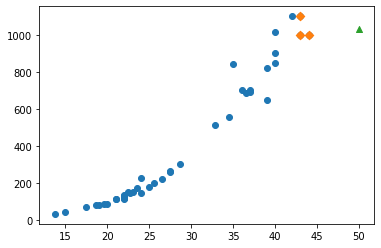

In [29]:
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50,1033,marker='^')
plt.show()

위 그래프를 보면 알겠지만 50cm이상의 농어들은 학습이 되어있지 않았다.<br> 따라서 아무리 큰 농어를 가지고 와도 1033g으로 예측될 것이다.

이 문제를 해결하기 위해 **선형회귀**를 사용할 수 있다.

선형회귀는 다음시간에...